# Portfolios

A portfolio is a form of investment in which you buy several different securities (stocks in our examples) to reduce your risk, instead of investing all your money in the same security.

Equally weighted: you invest the same amount of money (quantity by price) in each stock.
    
Weighted: you invest an amount of money which depends on some predetermined weights.

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf

In [2]:
tickers=["PG","MSFT","F","GE"]

In [3]:
d=yf.download(tickers,start="1995-1-1")["Adj Close"]

[*********************100%***********************]  4 of 4 completed


In [4]:
d.head(10)

F         GE      MSFT        PG
Date                                               
1995-01-03  3.970337  25.531639  2.346930  7.771260
1995-01-04  4.077163  25.531639  2.363990  7.708966
1995-01-05  4.041554  25.594208  2.324996  7.599947
1995-01-06  4.041554  25.469049  2.363990  7.615521
1995-01-09  4.112772  25.218740  2.349367  7.584373
1995-01-10  4.041554  25.406481  2.378612  7.677817
1995-01-11  4.041554  25.781946  2.393234  7.662243
1995-01-12  4.005944  25.719370  2.388361  7.740112
1995-01-13  4.077163  26.032257  2.446851  7.830952
1995-01-16  4.130576  26.345161  2.500468  7.893596

## Normalize

We want to compare them. The fact that companies have different starting value, is strongly misleading when comparing them. We need to <b>normalize</b> them, making them all start from 100.

We get the first value of every company, which is array <b>d.iloc[0]</b> and divide all the prices by this value and then multiply them by 100. We do this using vectorization.

In [5]:
d/d.iloc[0]*100

F          GE          MSFT           PG
Date                                                         
1995-01-03  100.000000  100.000000    100.000000   100.000000
1995-01-04  102.690592  100.000000    100.726939    99.198405
1995-01-05  101.793734  100.245063     99.065416    97.795553
1995-01-06  101.793734   99.754855    100.726939    97.995958
1995-01-09  103.587475   98.774467    100.103843    97.595142
...                ...         ...           ...          ...
2023-03-03  329.443053  338.011967  10877.616385  1813.734095
2023-03-06  326.924365  340.988674  10944.938466  1806.013457
2023-03-07  323.146358  338.364486  10829.042307  1770.111834
2023-03-08  326.924365  340.675360  10809.868448  1770.369248
2023-03-09  313.575380  358.613864  10751.068659  1757.372713

[7096 rows x 4 columns]

<AxesSubplot:xlabel='Date'>

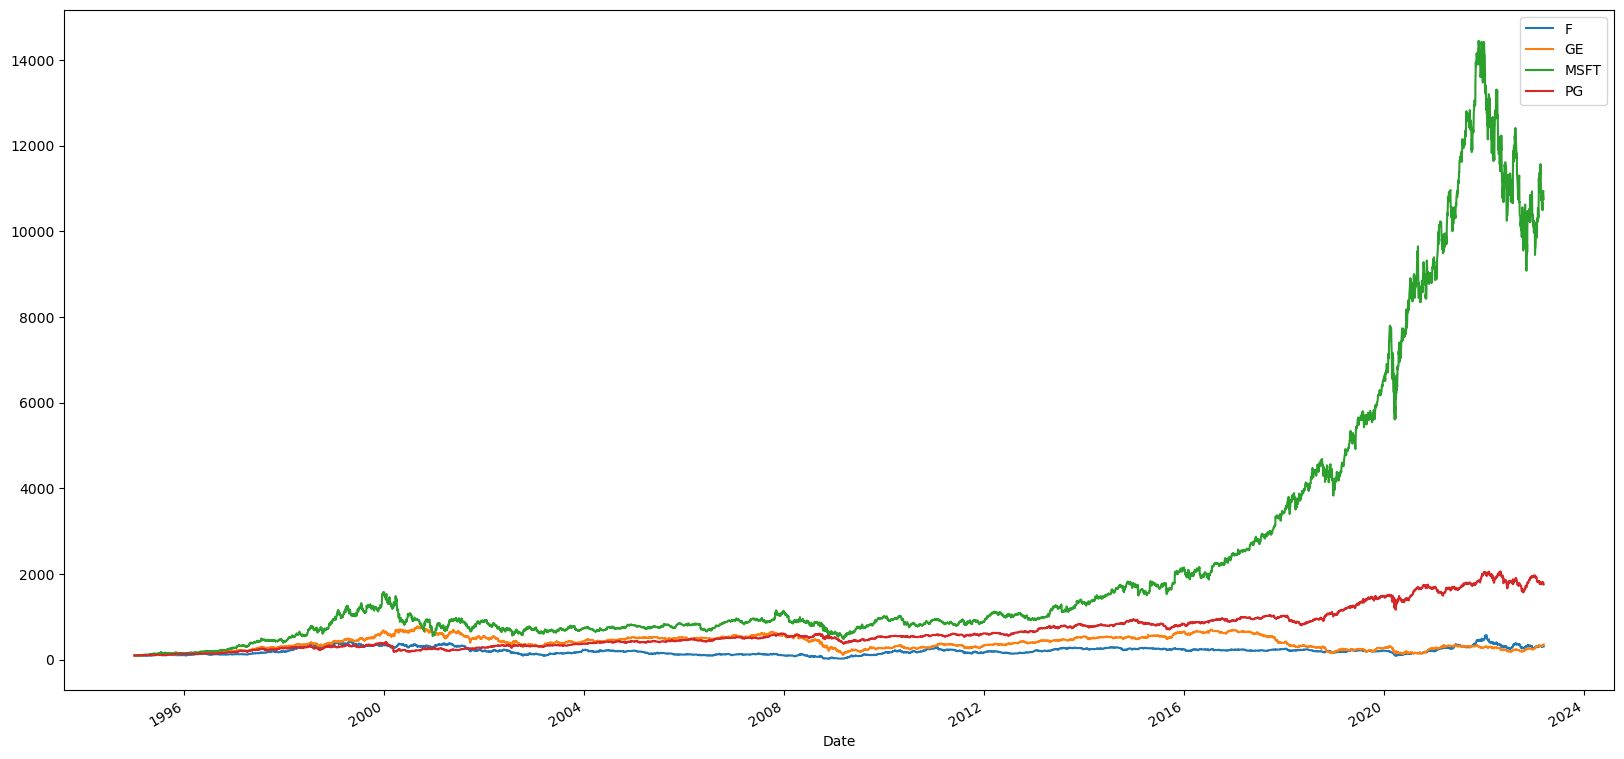

In [6]:
dN=d/d.iloc[0]*100
dN.plot(figsize=(20,10))

In [7]:
# returns = d/d.shift(1) -1 
returns = d.pct_change(1)
returns.head(10)

F        GE      MSFT        PG
Date                                              
1995-01-03       NaN       NaN       NaN       NaN
1995-01-04  0.026906  0.000000  0.007269 -0.008016
1995-01-05 -0.008734  0.002451 -0.016495 -0.014142
1995-01-06  0.000000 -0.004890  0.016772  0.002049
1995-01-09  0.017621 -0.009828 -0.006186 -0.004090
1995-01-10 -0.017316  0.007444  0.012448  0.012321
1995-01-11  0.000000  0.014778  0.006147 -0.002028
1995-01-12 -0.008811 -0.002427 -0.002037  0.010163
1995-01-13  0.017778  0.012165  0.024490  0.011736
1995-01-16  0.013101  0.012020  0.021913  0.008000

In [8]:
weights=[0.20,0.35,0.25,0.20]

### Check whether the sum of weights makes 1

In [9]:
sum(weights)

1.0

In [10]:
weights=weights/sum(weights)

TypeError: unsupported operand type(s) for /: 'list' and 'float'

Lists do not accept being divided by a single number :-(  We will use **numpy.divide( )**

In [11]:
weights = np.divide(weights,sum(weights))
weights

array([0.2 , 0.35, 0.25, 0.2 ])

## Calculating the portfolio's return

Calculating the portfolio's return day by day requires the calculation of a weighted average on the stocks' returns for each day. For example, in our case:

$
\begin{matrix}
-0.008015\cdot 0.20&+&0.007269\cdot 0.35&+&0.026906\cdot 0.25&+&0.000000\cdot 0.20&=&+0.00766767\\
-0.014142\cdot 0.20&+&-0.016495\cdot 0.35&+&-0.008733\cdot 0.25&+&0.002451\cdot 0.20&=&-0.0102948\\
0.002049\cdot 0.20&+&0.016771\cdot 0.35&+&0.000000\cdot 0.25&+&-0.004890\cdot 0.20&=&+0.00530181\\
-0.004090\cdot 0.20&+&-0.006185\cdot 0.35&+&0.017621\cdot 0.25&+&-0.009828\cdot 0.20&=&-0.00054317\\
0.012321\cdot 0.20&+&0.012448\cdot 0.35&+&-0.017316\cdot 0.25&+&0.007444\cdot 0.20&=&0.003981
\end{matrix}
$

If you take a look, however, at your DataFrame and at your weight's array considering them a matrix and a vector:

$
\begin{matrix}
\begin{pmatrix}
-0.008015&0.007269&0.026906&0.000000\\
-0.014142&-0.016495&-0.008733&0.002451\\
0.002049&0.016771&0.000000&-0.004890\\
-0.004090&-0.006185&0.017621&-0.009828\\
0.012321&0.012448&-0.017316&0.007444
\end{pmatrix}
&&&&&
\begin{pmatrix}
0.20\\0.35\\0.25\\0.20
\end{pmatrix}
\end{matrix}
$

What is written above is exactly the matrix multiplication of the DataFrame by the weights' array! So we could conveniently use the matrix multiplication, which is <b>numpy.dot(< matrix 1 >,< matrix 2 >)</b>, to calculate the portfolio's returns.

In [12]:
portfolioReturns=np.dot(returns,weights) # numpy.dot is the matrix multiplication 
print(portfolioReturns)

[        nan  0.00559534 -0.00784121 ... -0.01162782  0.00431504
  0.007435  ]


In [13]:
annualPortfolioReturn = (portfolioReturns.mean()+1)**250-1
print(annualPortfolioReturn)

nan


In [14]:
annualPortfolioReturn = (portfolioReturns[1:].mean()+1)**250-1
print(annualPortfolioReturn)

0.1466053205806197


In [15]:
print("The annual return of the portfolio is", round(annualPortfolioReturn,4)*100,"%")

The annual return of the portfolio is 14.66 %


In [16]:
weights=[0.40,0.15,0.25,0.20]
portfolioReturns=np.dot(returns,weights)
annualPortfolioReturn = (portfolioReturns[1:].mean()+1)**250-1
print("The annual return of the portfolio is", round(annualPortfolioReturn,4)*100,"%")

The annual return of the portfolio is 15.229999999999999 %


# Indexes

In [17]:
tickers=["^GSPC","^IXIC","^GDAXI"]
# S&P500, Nasdaq Composite, DAX performance index

In [18]:
ind=yf.download(tickers,start="1995-1-1")["Adj Close"]
ind

[*********************100%***********************]  3 of 3 completed


^GDAXI        ^GSPC         ^IXIC
Date                                               
1995-01-02   2079.189941          NaN           NaN
1995-01-03   2068.919922   459.109985    743.580017
1995-01-04   2072.899902   460.709991    745.840027
1995-01-05   2051.459961   460.339996    745.659973
1995-01-06   2058.199951   460.679993    749.690002
...                  ...          ...           ...
2023-03-06  15653.580078  4048.419922  11675.740234
2023-03-07  15559.530273  3986.370117  11530.330078
2023-03-08  15631.870117  3992.010010  11576.000000
2023-03-09  15633.209961  3918.320068  11338.349609
2023-03-10  15448.980469          NaN           NaN

[7276 rows x 3 columns]

<AxesSubplot:xlabel='Date'>

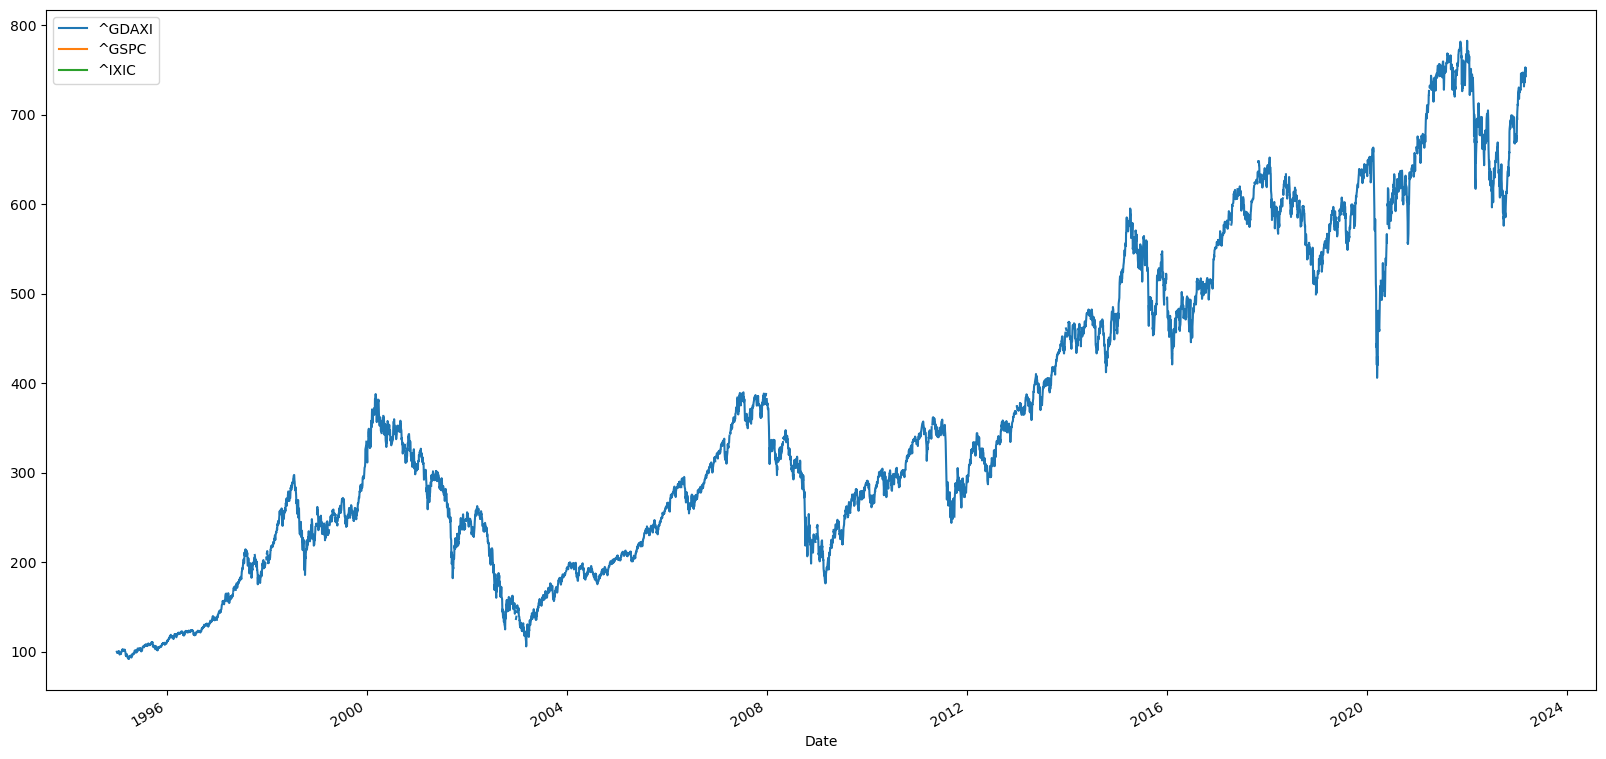

In [19]:
(100*ind/ind.iloc[0]).plot(figsize=(20,10))

# Instructions on how to deal with missing values

The data that you download may contain missing values. Most of the times these do not disturb your graphs and your calculations, as many functions and graph tools are "robust", which means that they can cope with missing values simply skipping them. 

It may however happen that you have to use a method or function that does not work if there are missing values. You have two ways to deal with it here:
- use method <b>< DataFrame >.dropna()</b> which returns another DataFrame without the rows containing any missing value. This is the best choice if you are doing a rigorous analysis and whenever you have a long sequence of missing values;
- use method <b>< DataFrame >.fillna(< arguments >, limit=N)</b> which returns another DataFrame with the missing values (maximum N consecutive ones, to avoid replacing an entire year of stock data...) replaced by:
  - a fixed value if you pass as argument a value
  - the previous value if you pass as argument <b>method='ffill'</b>
  - the next value if you pass as argument <b>method='bfill'</b>;
- use method <b>< DataFrame >.interpolate(< arguments >, limit=N)</b> which returns another DataFrame with the missing values (maximum N consecutive ones, to avoid replacing an entire year of stock data...) replaced by:
  - <b>method='linear'</b>, uses linear interpolation
  - <b>method='time'</b>, as linear but takes into account how many effective days are there between the observations
  - and several other more complex methods.
  <br>This is the best choice for occasional missing values.

In [20]:
ind2=ind.dropna()
ind2

^GDAXI        ^GSPC         ^IXIC
Date                                               
1995-01-03   2068.919922   459.109985    743.580017
1995-01-04   2072.899902   460.709991    745.840027
1995-01-05   2051.459961   460.339996    745.659973
1995-01-06   2058.199951   460.679993    749.690002
1995-01-09   2053.409912   460.829987    752.090027
...                  ...          ...           ...
2023-03-03  15578.389648  4045.639893  11689.009766
2023-03-06  15653.580078  4048.419922  11675.740234
2023-03-07  15559.530273  3986.370117  11530.330078
2023-03-08  15631.870117  3992.010010  11576.000000
2023-03-09  15633.209961  3918.320068  11338.349609

[6964 rows x 3 columns]

<AxesSubplot:xlabel='Date'>

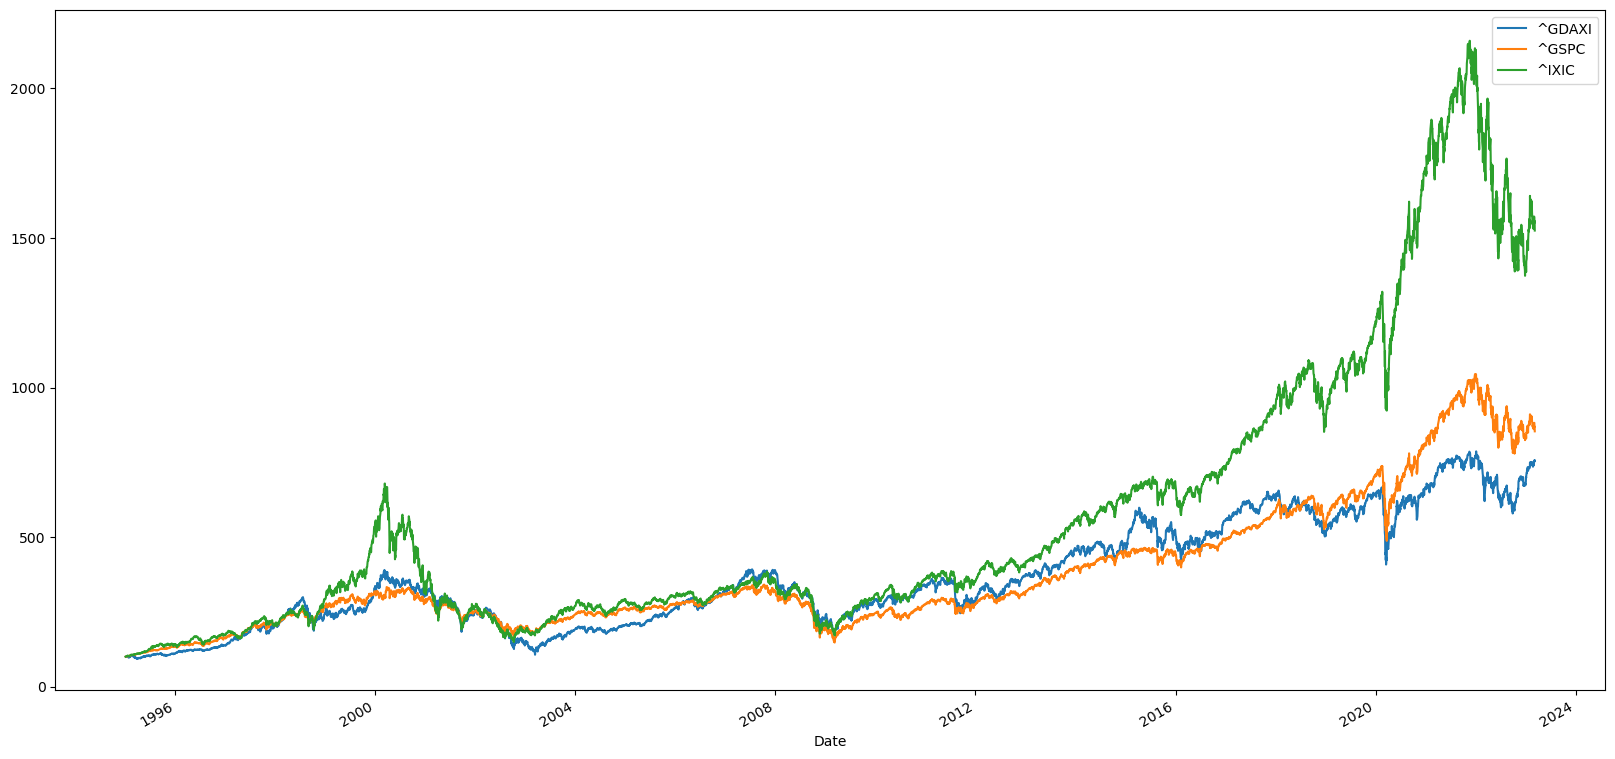

In [21]:
(100*ind2/ind2.iloc[0]).plot(figsize=(20,10))

In [22]:
ind3=ind.interpolate(method="time")
ind3

^GDAXI        ^GSPC         ^IXIC
Date                                               
1995-01-02   2079.189941          NaN           NaN
1995-01-03   2068.919922   459.109985    743.580017
1995-01-04   2072.899902   460.709991    745.840027
1995-01-05   2051.459961   460.339996    745.659973
1995-01-06   2058.199951   460.679993    749.690002
...                  ...          ...           ...
2023-03-06  15653.580078  4048.419922  11675.740234
2023-03-07  15559.530273  3986.370117  11530.330078
2023-03-08  15631.870117  3992.010010  11576.000000
2023-03-09  15633.209961  3918.320068  11338.349609
2023-03-10  15448.980469  3918.320068  11338.349609

[7276 rows x 3 columns]

<AxesSubplot:xlabel='Date'>

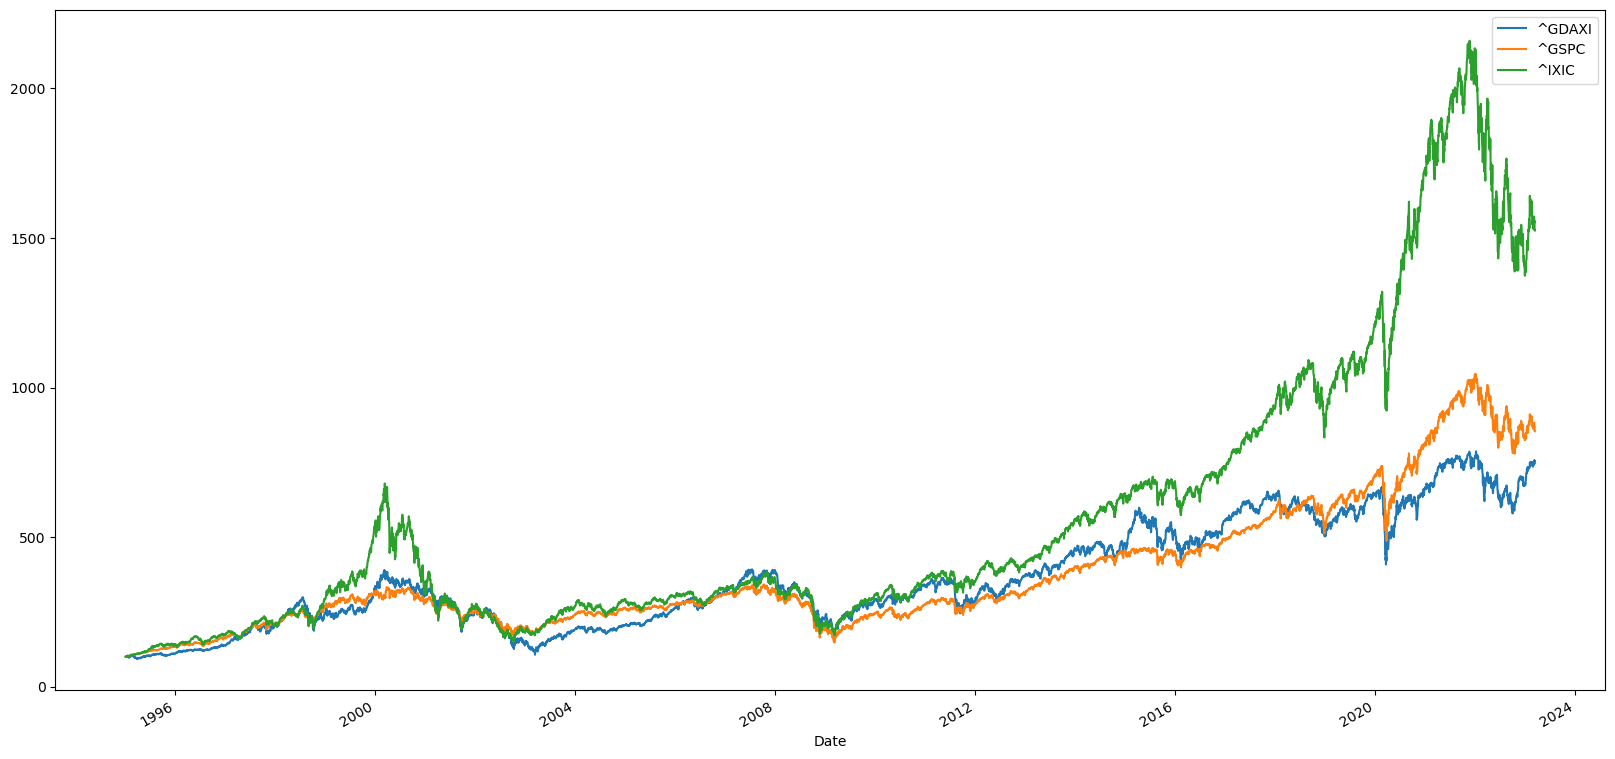

In [23]:
ind3bis=ind3[1:]
(100*ind3bis/ind3bis.iloc[0]).plot(figsize=(20,10))